# Recurrent Neural Networks and Long Short Term Memory

## 1. What is meant by Recurrent Neural Networks?

Recurrent neural network is a type of neural network in which the output form the previous step is fed as input to the current step.

In traditional neural networks, all the inputs and outputs are independent of each other, but this is not a good idea if we want to predict the next word in a sentence. We need to remember the previous word in order to generate the next word in a sentence, hence traditional neural networks are not efficient for NLP applications.

RNNs also have a hidden stage which used to capture information about a sentence.

RNNs have a ‘memory’, which is used to capture information about the calculations made so far.

In theory, RNNs can use information in arbitrary long sequences, but practically they are limited to look back only a few steps.

## 2. What is meant by vanishing and exploding gradient and why is that a problem in RNN?

RNNs work upon the fact that the result of an information is dependent on its previous state or previous n time steps. Regular RNNs might have a difficulty in learning long range dependencies. For instance if we have a sentence like “The man who ate my pizza has purple hair”. In this case, the description purple hair is for the man and not the pizza. So this is a long dependency.

If we backpropagate the error in this case, we would need to apply the chain rule. To calculate the error after the third time step with respect to the first one –

∂E/∂W = ∂E/∂y3 *∂y3/∂h3 *∂h3/∂y2 *∂y2/∂h1 .. and there is a long dependency.

Here we apply the chain rule and if any one of the gradients approached 0, all the gradients would rush to zero exponentially fast due to the multiplication. Such states would no longer help the network to learn anything. This is known as the vanishing gradient problem.

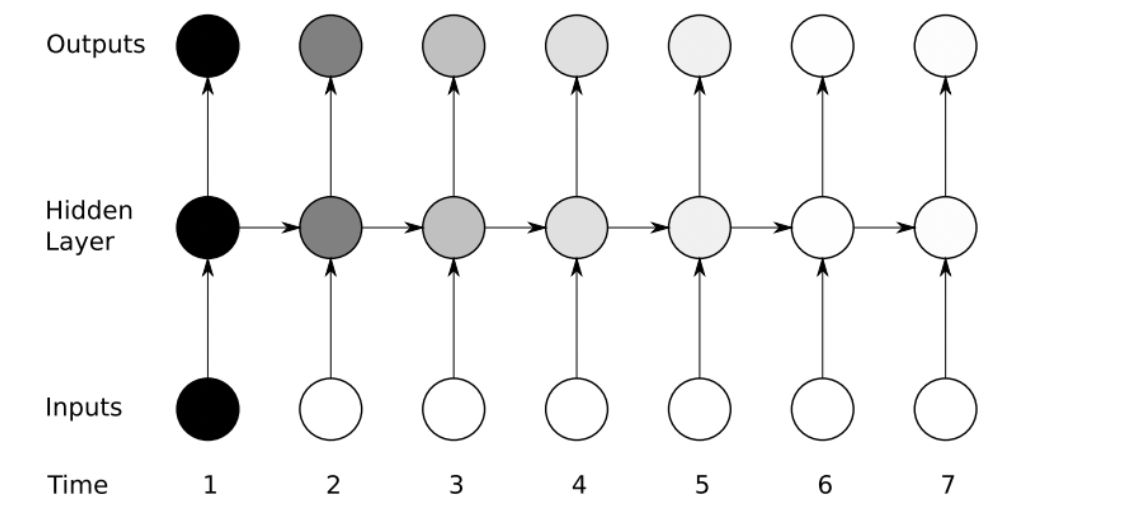

Vanishing gradient problem is far more threatening as compared to the exploding gradient problem, where the gradients become very very large due to a single or multiple gradient values becoming very high.

The reason why Vanishing gradient problem is more concerning is that an exploding gradient problem can be easily solved by clipping the gradients at a predefined threshold value. Fortunately there are ways to handle vanishing gradient problem as well. There are architectures like the LSTM(Long Short term memory) and the GRU(Gated Recurrent Units) which can be used to deal with the vanishing gradient problem.

During the training of all a deep network, the gradients are propagated back in time all the way to the initial layer
Gradients that come from deeper layers go through multiple matrix multiplications according to the chain rule, and when they approach the earlier layers, if they have small values ( <1 ) they shrink exponentially till they vanish
Vanishing gradient make model learning difficult
While if they have large values (>1), then they eventually blow up and crash the model, this is the exploding gradient problem

## 3. What is meant by Long Short Term Memory?

Long short-term memory (LSTM) is an artificial neural network used in the fields of artificial intelligence and deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. Such a recurrent neural network can process not only single data points (such as images), but also entire sequences of data (such as speech or video). For example, LSTM is applicable to tasks such as unsegmented, connected handwriting recognition,speech recognition, machine translation, robot control,video games, and healthcare. LSTM has become the most cited neural network of the 20th century.

A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell remembers values over arbitrary time intervals and the three gates regulate the flow of information into and out of the cell.

LSTM networks are well-suited to classifying, processing and making predictions based on time series data, since there can be lags of unknown duration between important events in a time series. LSTMs were developed to deal with the vanishing gradient problem that can be encountered when training traditional RNNs.

## 4. What is meant by Gated Recurrent Unit?

Gated recurrent units (GRUs) are a gating mechanism in recurrent neural networks, introduced in 2014 by Kyunghyun Cho et.The GRU is like a long short-term memory (LSTM) with a forget gate,but has fewer parameters than LSTM, as it lacks an output gate. GRU's performance on certain tasks of polyphonic music modeling, speech signal modeling and natural language processing was found to be similar to that of LSTM. GRUs have been shown to exhibit better performance on certain smaller and less frequent datasets.

## 5. Train a bi-directional LSTM on imdb movies sentiment dataset from keras (tutorial available on its website, follow that tutorial) (https://keras.io/examples/nlp/bidirectional_lstm_imdb/)

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

max_features = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review

In [2]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

2022-04-30 14:26:38.227553: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-30 14:26:38.230901: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         98816     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,757,761
Trainable params: 2,757,761
Non-trainable params: 0
_________________________________________________________________


In [3]:
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(
    num_words=max_features
)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)

17465344/17464789 [==============================] - 4s 0us/step
25000 Training sequences
25000 Validation sequences


In [4]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2


2022-04-30 14:27:09.312599: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_standard_lstm_9610_10097' and '__inference___backward_standard_lstm_9610_10097_specialized_for_StatefulPartitionedCall_1_at___inference_distributed_function_11358' both implement 'lstm_f7932d6e-eebe-4f90-8205-725aaeac43b2' but their signatures do not match.


24992/25000 [============================>.] - ETA: 0s - loss: 0.4049 - accuracy: 0.8164

2022-04-30 14:46:33.907713: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_cudnn_lstm_with_fallback_15434' and '__inference_standard_lstm_15321_specialized_for_model_bidirectional_1_backward_lstm_1_StatefulPartitionedCall_at___inference_distributed_function_15686' both implement 'lstm_37905773-092d-4fad-a1ee-486dae07f67f' but their signatures do not match.


25000/25000 [==============================] - 1488s 60ms/sample - loss: 0.4048 - accuracy: 0.8165 - val_loss: 0.3734 - val_accuracy: 0.8418
Epoch 2/2
25000/25000 [==============================] - 71889s 3s/sample - loss: 0.2210 - accuracy: 0.9161 - val_loss: 0.3778 - val_accuracy: 0.8641


##### References:

https://www.analyticsvidhya.com/blog/2017/12/introduction-to-recurrent-neural-networks/#h2_9

https://en.wikipedia.org/wiki/Long_short-term_memory

https://en.wikipedia.org/wiki/Gated_recurrent_unit